In [77]:
import sqlite3 as sql
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#reading the Sql database
conn = sql.connect('archive/basketball.sqlite')
conn

In [79]:
#loading data
df_games = pd.read_sql('select * from Game', conn)

In [203]:
df_games.shape

(62448, 149)

In [80]:
df_games

,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,GAME_DATE,MATCHUP_HOME,WL_HOME,MIN_HOME,FGM_HOME,...,LAST_GAME_VISITOR_TEAM_CITY1,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,VIDEO_AVAILABLE_FLAG,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS,HISTORICAL_STATUS
0,0024600001,21946,1610610035,HUS,Toronto Huskies,1946-11-01,HUS vs. NYK,L,0,25.0,...,None,None,3.0,3.0,Tied,0.0,0.0,0.0,0.0,1.0
1,0024600003,21946,1610610034,BOM,St. Louis Bombers,1946-11-02,BOM vs. PIT,W,0,20.0,...,None,None,5.0,1.0,St. Louis,0.0,0.0,0.0,0.0,1.0
2,0024600004,21946,1610610025,CHS,Chicago Stags,1946-11-02,CHS vs. NYK,W,0,21.0,...,None,None,3.0,3.0,Tied,0.0,0.0,0.0,0.0,1.0
3,0024600002,21946,1610610032,PRO,Providence Steamrollers,1946-11-02,PRO vs. BOS,W,0,21.0,...,None,None,5.0,1.0,Providence,0.0,0.0,0.0,0.0,1.0
4,0024600005,21946,1610610028,DEF,Detroit Falcons,1946-11-02,DEF vs. WAS,L,0,10.0,...,None,None,1.0,5.0,Washington,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62443,0022001076,22020,1610612757,POR,Portland Trail Blazers,2021-05-16,POR vs. DEN,W,240,46.0,...,DEN,106,1.0,2.0,Denver,1.0,0.0,0.0,1.0,0.0
62444,0022001071,22020,1610612750,MIN,Minnesota Timberwolves,2021-05-16,MIN vs. DAL,W,240,49.0,...,DAL,128,1.0,2.0,Dallas,1.0,0.0,0.0,0.0,0.0
62445,0022001068,22020,1610612741,CHI,Chicago Bulls,2021-05-16,CHI vs. MIL,W,240,45.0,...,MIL,108,1.0,2.0,Milwaukee,1.0,0.0,0.0,1.0,0.0
62446,0022001072,22020,1610612740,NOP,New Orleans Pelicans,2021-05-16,NOP vs. LAL,L,240,37.0,...,LAL,111,1.0,2.0,L.A. Lakers,1.0,0.0,0.0,0.0,0.0


In [81]:
#name of all the columns in the database
for col in df_games.columns:
    print(col)

GAME_ID
SEASON_ID
TEAM_ID_HOME
TEAM_ABBREVIATION_HOME
TEAM_NAME_HOME
GAME_DATE
MATCHUP_HOME
WL_HOME
MIN_HOME
FGM_HOME
FGA_HOME
FG_PCT_HOME
FG3M_HOME
FG3A_HOME
FG3_PCT_HOME
FTM_HOME
FTA_HOME
FT_PCT_HOME
OREB_HOME
DREB_HOME
REB_HOME
AST_HOME
STL_HOME
BLK_HOME
TOV_HOME
PF_HOME
PTS_HOME
PLUS_MINUS_HOME
VIDEO_AVAILABLE_HOME
TEAM_ID_AWAY
TEAM_ABBREVIATION_AWAY
TEAM_NAME_AWAY
MATCHUP_AWAY
WL_AWAY
MIN_AWAY
FGM_AWAY
FGA_AWAY
FG_PCT_AWAY
FG3M_AWAY
FG3A_AWAY
FG3_PCT_AWAY
FTM_AWAY
FTA_AWAY
FT_PCT_AWAY
OREB_AWAY
DREB_AWAY
REB_AWAY
AST_AWAY
STL_AWAY
BLK_AWAY
TOV_AWAY
PF_AWAY
PTS_AWAY
PLUS_MINUS_AWAY
VIDEO_AVAILABLE_AWAY
GAME_DATE_EST
GAME_SEQUENCE
GAME_STATUS_ID
GAME_STATUS_TEXT
GAMECODE
HOME_TEAM_ID
VISITOR_TEAM_ID
SEASON
LIVE_PERIOD
LIVE_PC_TIME
NATL_TV_BROADCASTER_ABBREVIATION
LIVE_PERIOD_TIME_BCAST
WH_STATUS
TEAM_CITY_HOME
PTS_PAINT_HOME
PTS_2ND_CHANCE_HOME
PTS_FB_HOME
LARGEST_LEAD_HOME
LEAD_CHANGES_HOME
TIMES_TIED_HOME
TEAM_TURNOVERS_HOME
TOTAL_TURNOVERS_HOME
TEAM_REBOUNDS_HOME
PTS_OFF_TO_HOME


In [82]:
nba_needed_columns = df_games

In [83]:
#creating a new dataframe with only needed colums relevant for the analysis 
#nba_needed_columns_list = ['GAME_ID','GAME_DATE','year','TEAM_ABBREVIATION_HOME','TEAM_NAME_HOME','FGM_HOME',
#                           'FGA_HOME','FG_PCT_HOME','FG3M_HOME','FG3A_HOME','FG3_PCT_HOME','FTM_HOME','FTA_HOME',
#                           'FT_PCT_HOME','OREB_HOME','DREB_HOME','REB_HOME','AST_HOME','STL_HOME','BLK_HOME',
#                           'TOV_HOME','PF_HOME','PTS_HOME','WL_HOME','TEAM_ABBREVIATION_AWAY','TEAM_NAME_AWAY',
#                           'FGM_AWAY','FGA_AWAY','FG_PCT_AWAY','FG3M_AWAY','FG3A_AWAY','FG3_PCT_AWAY','FTM_AWAY',
#                           'FTA_AWAY','FT_PCT_AWAY','OREB_AWAY','DREB_AWAY','REB_AWAY','AST_AWAY','STL_AWAY',
#                           'BLK_AWAY','TOV_AWAY','PF_AWAY','PTS_AWAY','WL_AWAY']

In [84]:
#CREATING 1 for win and 0 for loss in the WL_HOME & WL_AWAY COLUMN
#nba_needed_columns['hwin']= np.where(nba_needed_columns['PTS_HOME']>nba_needed_columns['PTS_AWAY'],1,0)
#nba_needed_columns['awin']= np.where(nba_needed_columns['PTS_AWAY']>nba_needed_columns['PTS_HOME'],1,0)


In [85]:
#changing data type for season_id column
nba_needed_columns["SEASON_ID"] = pd.to_numeric(nba_needed_columns["SEASON_ID"])

In [86]:
nba_after05_a = nba_needed_columns.loc[(nba_needed_columns["SEASON_ID"] >= 22005)]

In [ ]:
features = ['FGM_HOME','FGA_HOME','FG_PCT_HOME','FG3M_HOME','FG3A_HOME','FG3_PCT_HOME','FTM_HOME','FTA_HOME',
            'FT_PCT_HOME','OREB_HOME','DREB_HOME','REB_HOME','AST_HOME','STL_HOME','BLK_HOME','TOV_HOME',
            'PF_HOME','PTS_HOME',
            'FGM_AWAY','FGA_AWAY','FG_PCT_AWAY','FG3M_AWAY','FG3A_AWAY','FG3_PCT_AWAY','FTM_AWAY','FTA_AWAY',
            'FT_PCT_AWAY','OREB_AWAY','DREB_AWAY','REB_AWAY','AST_AWAY','STL_AWAY','BLK_AWAY','TOV_AWAY',
            'PF_AWAY','PTS_AWAY',]

In [140]:
nba_team_stats = nba_after05_a[features]

In [201]:
nba_team_stats.to_csv('nba_team_data.csv')

In [142]:
nba_team_stats = nba_team_stats.astype(float)

In [147]:
nba_team_stats['SEASON_ID'] = nba_after05_a['SEASON_ID']
nba_team_stats['TEAM_NAME_HOME'] = nba_after05_a['TEAM_NAME_HOME']
nba_team_stats['TEAM_NAME_AWAY'] = nba_after05_a['TEAM_NAME_AWAY']

In [171]:
season_stats = nba_team_stats.groupby('SEASON_ID')[features].mean()

In [172]:
for col in season_stats.columns:
    print(col)

FGM_HOME
FGA_HOME
FG_PCT_HOME
FG3M_HOME
FG3A_HOME
FG3_PCT_HOME
FTM_HOME
FTA_HOME
FT_PCT_HOME
OREB_HOME
DREB_HOME
REB_HOME
AST_HOME
STL_HOME
BLK_HOME
TOV_HOME
PF_HOME
PTS_HOME
FGM_AWAY
FGA_AWAY
FG_PCT_AWAY
FG3M_AWAY
FG3A_AWAY
FG3_PCT_AWAY
FTM_AWAY
FTA_AWAY
FT_PCT_AWAY
OREB_AWAY
DREB_AWAY
REB_AWAY
AST_AWAY
STL_AWAY
BLK_AWAY
TOV_AWAY
PF_AWAY
PTS_AWAY


In [153]:
team_stats_home = nba_team_stats.groupby('TEAM_NAME_HOME')[features].mean()

In [154]:
team_stats_home

,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,...,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY
TEAM_NAME_HOME,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,38.474922,83.122257,0.464150,8.554859,23.819749,0.356735,18.007837,23.482759,0.766588,10.478056,...,0.763152,10.943574,31.454545,42.398119,22.684953,7.733542,4.598746,14.547022,20.601881,101.658307
Boston Celtics,38.476562,82.676563,0.467337,8.375000,23.189062,0.360005,17.792188,22.981250,0.776645,9.964063,...,0.756353,10.498437,31.293750,41.792187,20.953125,7.379688,4.575000,15.196875,20.484375,98.457813
Brooklyn Nets,38.571429,84.274725,0.458824,10.288462,28.500000,0.358937,17.821429,23.585165,0.754640,10.170330,...,0.757365,10.879121,33.101648,43.980769,21.846154,8.173077,4.725275,13.695055,20.620879,105.269231
Charlotte Bobcats,35.578512,80.118457,0.445063,5.575758,15.906336,0.347904,19.429752,26.170799,0.742826,10.988981,...,0.748110,10.785124,30.895317,41.680441,20.707989,6.922865,5.895317,14.848485,22.154270,96.796143
Charlotte Hornets,38.525735,86.272059,0.447033,10.544118,29.500000,0.352904,18.540441,24.044118,0.769518,9.823529,...,0.764511,9.341912,34.625000,43.966912,24.139706,6.930147,5.522059,13.268382,20.963235,104.705882
Chicago Bulls,37.905808,84.813187,0.448046,7.452119,20.695447,0.358998,17.419152,22.657771,0.768978,11.780220,...,0.756378,10.496075,31.998430,42.494505,21.362637,7.342229,5.518053,14.130298,20.010989,98.568289
Cleveland Cavaliers,38.040689,83.043818,0.459264,8.768388,23.868545,0.364394,17.682316,23.768388,0.744923,11.266041,...,0.758501,10.156495,30.938967,41.095462,23.294210,7.338028,4.998435,13.502347,20.630673,100.408451
Dallas Mavericks,38.483619,82.897036,0.465384,9.054602,24.861154,0.367226,18.756630,23.772231,0.788749,10.375975,...,0.758474,10.845554,32.123245,42.968799,20.168487,7.371295,3.914197,14.433697,21.468019,100.340094
Denver Nuggets,40.064062,85.137500,0.471511,8.340625,23.300000,0.353922,20.590625,27.459375,0.752375,11.484375,...,0.751003,10.601562,31.195312,41.796875,23.351562,7.639062,5.237500,14.760938,22.715625,103.426563


In [155]:
team_stats_away = nba_team_stats.groupby('TEAM_NAME_AWAY')[features].mean()

In [156]:
team_stats_away

,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,...,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY
TEAM_NAME_AWAY,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,38.604396,83.453689,0.463537,8.274725,22.872841,0.361199,17.722135,23.353218,0.760099,11.210361,...,0.758669,10.164835,30.976452,41.141287,21.701727,7.872841,4.810047,15.039246,20.397174,99.864992
Boston Celtics,36.687988,81.733229,0.449822,7.684867,22.322933,0.340646,19.511700,25.681747,0.762243,10.770671,...,0.775423,9.847114,31.758190,41.605304,21.920437,7.936037,4.505460,14.748830,22.109204,100.989080
Brooklyn Nets,40.627717,87.046196,0.467924,9.725543,26.603261,0.364774,17.057065,22.388587,0.760062,10.673913,...,0.766465,10.097826,32.956522,43.054348,22.494565,7.114130,4.475543,14.611413,20.067935,104.203804
Charlotte Bobcats,37.845730,80.303030,0.472997,7.159780,19.066116,0.370895,17.851240,23.658402,0.758953,11.206612,...,0.734793,10.498623,29.151515,39.650138,20.217631,7.402204,4.253444,14.829201,20.834711,93.104683
Charlotte Hornets,40.352727,86.461818,0.467887,11.570909,30.963636,0.371938,15.040000,19.330909,0.781091,9.596364,...,0.776084,9.898182,33.476364,43.374545,22.214545,7.250909,4.236364,12.840000,17.912727,103.472727
Chicago Bulls,37.874016,83.596850,0.453855,7.853543,22.036220,0.351794,18.365354,24.096063,0.761863,10.859843,...,0.761880,10.976378,32.368504,43.344882,21.872441,7.171654,4.505512,14.899213,20.705512,99.826772
Cleveland Cavaliers,38.898894,82.535545,0.471934,8.180095,22.769352,0.353771,17.486572,23.254344,0.751338,10.274882,...,0.741856,10.864139,31.148499,42.012638,19.916272,7.074250,3.739336,14.254344,20.500790,99.957346
Dallas Mavericks,37.718750,82.851562,0.456286,8.290625,23.203125,0.352816,18.035937,23.746875,0.760881,10.476562,...,0.784669,9.662500,32.028125,41.690625,21.860937,6.971875,4.603125,13.046875,20.254687,101.326562
Denver Nuggets,39.742947,85.112853,0.467868,8.833856,24.101881,0.364618,18.045455,23.680251,0.762892,11.233542,...,0.758245,11.326019,31.518809,42.844828,22.315047,8.148903,4.615987,15.018809,20.967085,104.435737


In [94]:
nba_after05 = nba_after05_a.dropna()

In [100]:
nba_after05 = nba_after05_a[features]

In [101]:
nba_after05 = nba_after05.astype(float)

In [102]:
nba_after05['totalPTS'] = nba_after05['PTS_HOME'] + nba_after05['PTS_AWAY']

In [103]:
#calculcating rebound differential
nba_after05['REB_DIFF_HOME'] = nba_after05['REB_HOME'] - nba_after05['REB_AWAY']
nba_after05['REB_DIFF_AWAY'] = nba_after05['REB_AWAY'] - nba_after05['REB_HOME']

In [104]:
#calculating possession
nba_after05['POSS_HOME'] = (nba_after05['FGA_HOME'] - nba_after05['OREB_HOME']) + nba_after05['TOV_HOME'] + (0.44 * nba_after05['FTA_HOME'])
nba_after05['POSS_AWAY'] = (nba_after05['FGA_AWAY'] - nba_after05['OREB_AWAY']) + nba_after05['TOV_AWAY'] + (0.44 * nba_after05['FTA_AWAY'])

In [105]:
#clacualting defensive rating
nba_after05['D_RATING_AWAY'] = (nba_after05['PTS_HOME']) / (nba_after05['FGA_HOME'] + ((nba_after05['FTA_HOME'] * 0.9) / 2) + nba_after05['TOV_HOME'])
nba_after05['D_RATING_HOME'] = (nba_after05['PTS_AWAY']) / (nba_after05['FGA_AWAY'] + ((nba_after05['FTA_AWAY'] * 0.9) / 2) + nba_after05['TOV_AWAY'])

In [106]:
#calculating offensive rating
nba_after05['O_RATING_HOME'] = (nba_after05['PTS_HOME']) / (nba_after05['FGA_HOME'] + ((nba_after05['FTA_HOME'] * 0.9) / 2) + nba_after05['TOV_HOME'])
nba_after05['O_RATING_AWAY'] = (nba_after05['PTS_AWAY']) / (nba_after05['FGA_AWAY'] + ((nba_after05['FTA_AWAY'] * 0.9) / 2) + nba_after05['TOV_AWAY'])


In [107]:
for col in nba_after05.columns:
    print(col)

FGM_HOME
FGA_HOME
FG_PCT_HOME
FG3M_HOME
FG3A_HOME
FG3_PCT_HOME
FTM_HOME
FTA_HOME
FT_PCT_HOME
OREB_HOME
DREB_HOME
REB_HOME
AST_HOME
STL_HOME
BLK_HOME
TOV_HOME
PF_HOME
PTS_HOME
FGM_AWAY
FGA_AWAY
FG_PCT_AWAY
FG3M_AWAY
FG3A_AWAY
FG3_PCT_AWAY
FTM_AWAY
FTA_AWAY
FT_PCT_AWAY
OREB_AWAY
DREB_AWAY
REB_AWAY
AST_AWAY
STL_AWAY
BLK_AWAY
TOV_AWAY
PF_AWAY
PTS_AWAY
totalPTS
REB_DIFF_HOME
REB_DIFF_AWAY
POSS_HOME
POSS_AWAY
D_RATING_AWAY
D_RATING_HOME
O_RATING_HOME
O_RATING_AWAY


<AxesSubplot:>

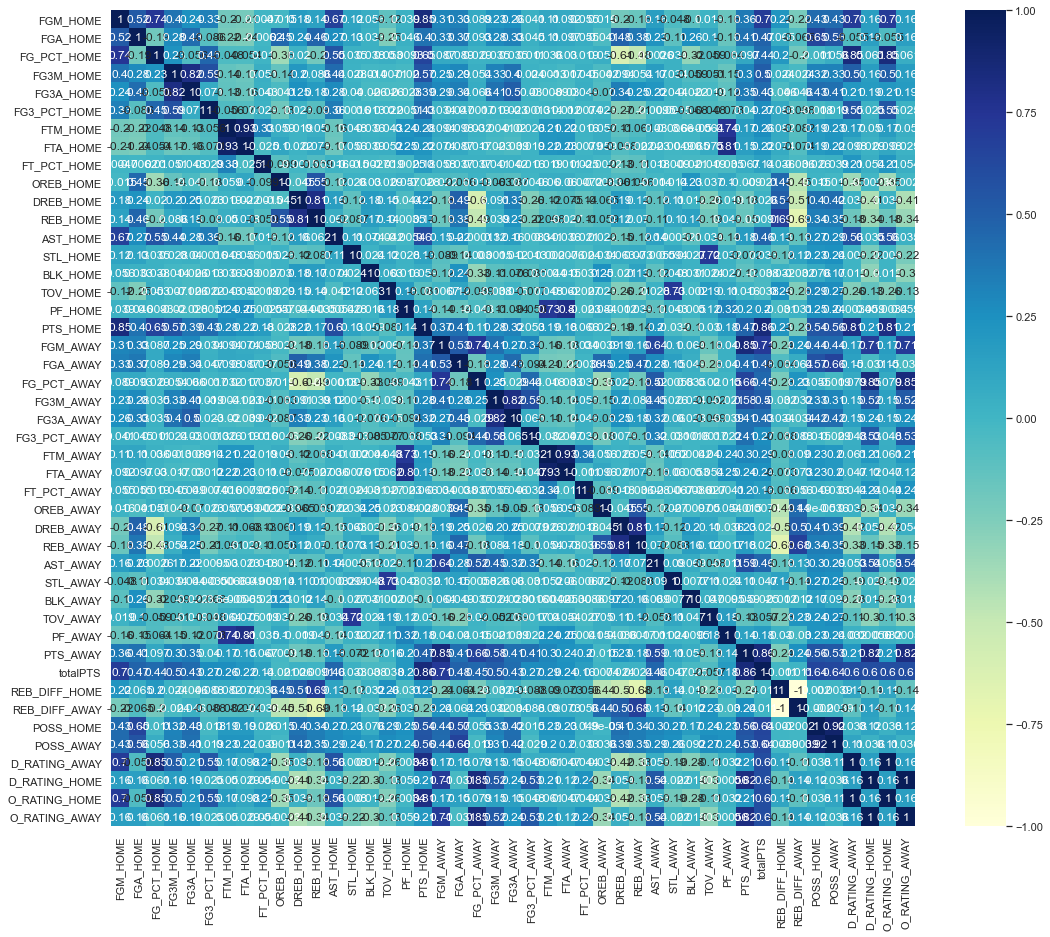

In [108]:
# correlation heat-map before changing the data type 
sns.set(rc = {'figure.figsize':(18,15)})
sns.heatmap(nba_after05.corr(), cmap="YlGnBu", annot=True)

In [109]:
ptsCorr = nba_after05.corr()['totalPTS'].sort_values(ascending=False)
ptsCorr.head(15)

totalPTS         1.000000
PTS_AWAY         0.858931
PTS_HOME         0.857164
FGM_AWAY         0.714824
FGM_HOME         0.704446
POSS_HOME        0.643433
POSS_AWAY        0.638985
D_RATING_HOME    0.600437
O_RATING_AWAY    0.600437
D_RATING_AWAY    0.595496
O_RATING_HOME    0.595496
FG3M_HOME        0.503385
FG3M_AWAY        0.501498
FGA_AWAY         0.478828
FGA_HOME         0.470457
Name: totalPTS, dtype: float64

In [110]:
ptsCorr.tail(15)

FT_PCT_HOME      0.141745
STL_AWAY         0.047495
STL_HOME         0.032760
DREB_HOME        0.025831
REB_AWAY         0.024118
DREB_AWAY        0.023633
REB_DIFF_AWAY    0.010903
REB_HOME         0.009051
OREB_AWAY        0.007379
REB_DIFF_HOME   -0.010903
OREB_HOME       -0.021309
BLK_AWAY        -0.025164
TOV_HOME        -0.037984
BLK_HOME        -0.038418
TOV_AWAY        -0.057383
Name: totalPTS, dtype: float64

In [ ]:
#analysis_df = nba_after05[['SEASON_ID','FGM_HOME','FGA_HOME','FG_PCT_HOME','FG3M_HOME','FG3A_HOME','FG3_PCT_HOME',
#                           'FTM_HOME','FTA_HOME','FT_PCT_HOME','OREB_HOME','DREB_HOME','REB_HOME','AST_HOME',
#                           'STL_HOME','BLK_HOME','TOV_HOME','PF_HOME','PTS_HOME','REB_DIFF_HOME','POSS_HOME',
#                           'D_RATING_HOME','O_RATING_HOME','FGM_AWAY','FGA_AWAY','FG_PCT_AWAY','FG3M_AWAY',
#                           'FG3A_AWAY','FG3_PCT_AWAY','FTM_AWAY','FTA_AWAY','FT_PCT_AWAY','OREB_AWAY','DREB_AWAY',
#                           'REB_AWAY','AST_AWAY','STL_AWAY','BLK_AWAY','TOV_AWAY','PF_AWAY','PTS_AWAY',
#                           'REB_DIFF_AWAY','POSS_AWAY','D_RATING_AWAY','O_RATING_AWAY','totalPTS']]

In [111]:
analysis_df = nba_after05

In [112]:
#dropping NAs from the dataframe
analysis_df = analysis_df.dropna()

In [113]:
target = analysis_df['totalPTS']

In [114]:
X = analysis_df[features]

In [115]:
#seting the target value
y = target

In [116]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [117]:
#building the model Gredent boostiong Regressor 
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
GB_predict_Train=GB.predict(X_train)

RMSE1=sqrt(mean_squared_error(y_train,GB_predict_Train))
print("RMSE (training) for GB:{0:10f}".format(RMSE1))
GB_predict_Test=GB.predict(X_test)
RMSE= sqrt(mean_squared_error(y_test,GB_predict_Test))
print("RMSE (Test Data) for GB:{0:10f}".format(RMSE))

RMSE (training) for GB:  0.790412
RMSE (Test Data) for GB:  0.843893


In [207]:
#reding the stats for the upcoming game
game = pd.read_csv("games10.csv")

In [208]:
#clacualting defensive rating
#game['D_RATING_AWAY'] = (game['PTS_HOME']) / (game['FGA_HOME'] + ((game['FTA_HOME'] * 0.9) / 2) + game['TOV_HOME'])
#game['D_RATING_HOME'] = (game['PTS_AWAY']) / (game['FGA_AWAY'] + ((game['FTA_AWAY'] * 0.9) / 2) + game['TOV_AWAY'])


In [209]:
#first 2 rows of the dataset is the home team and away team name so we select every column but those 2
game = game.iloc[: , 2:]

In [210]:
#making the predictions 
GB_predict_Tonight=GB.predict(game)
## the predicted score of the 5 matchups 
GB_predict_Tonight

array([222.33067564, 225.9005614 , 224.2243958 , 225.53314096,
       231.4094532 , 216.40976955, 228.45252554, 234.63669805,
       225.95601052, 225.54605535])

In [211]:
#building Random forest model
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
RF_predict_Train=RF.predict(X_train)

RMSE1=sqrt(mean_squared_error(y_train,RF_predict_Train))
print("RMSE (training) for RF:{0:10f}".format(RMSE1))
RF_predict_Test=RF.predict(X_test)
RMSE= sqrt(mean_squared_error(y_test,RF_predict_Test))
print("RMSE (Test Data) for RF:{0:10f}".format(RMSE))

RMSE (training) for RF:  0.433790
RMSE (Test Data) for RF:  0.786967


In [212]:
RF_predict_Tonight=RF.predict(game)
RF_predict_Tonight

array([223.05, 226.23, 222.89, 225.89, 231.58, 218.16, 229.13, 234.  ,
       226.06, 223.93])